In [9]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import numpy as np
import matplotlib.pyplot as plt


In [28]:
N = 1000
D = 2
K = 3

X = np.zeros((N*K, D))
Y = np.zeros(N*K, dtype='uint8')

In [29]:
for j in range(K):
    ix = range(N*j, N*(j+1))
    r = np.linspace(0.0, 1, N)
    t = np.linspace(j*4, (j+1)*4, N) + np.random.randn(N)*0.3
    X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
    Y[ix] = j

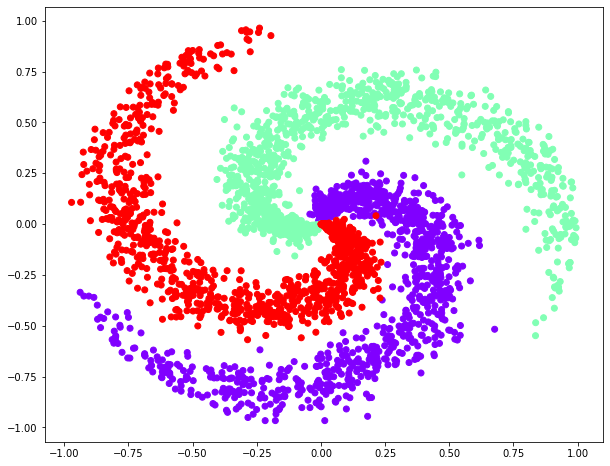

In [30]:
plt.figure(figsize=(10,8))
plt.scatter(X[:, 0], X[:, 1], c=Y, cmap=plt.cm.rainbow)


In [31]:
X.shape, Y.shape

((3000, 2), (3000,))

In [4]:
print(nn.Module.__doc__)

Base class for all neural network modules.

    Your models should also subclass this class.

    Modules can also contain other Modules, allowing to nest them in
    a tree structure. You can assign the submodules as regular attributes::

        import torch.nn as nn
        import torch.nn.functional as F

        class Model(nn.Module):
            def __init__(self):
                super(Model, self).__init__()
                self.conv1 = nn.Conv2d(1, 20, 5)
                self.conv2 = nn.Conv2d(20, 20, 5)

            def forward(self, x):
                x = F.relu(self.conv1(x))
                return F.relu(self.conv2(x))

    Submodules assigned in this way will be registered, and will have their
    parameters converted too when you call :meth:`to`, etc.
    


In [5]:
N, D_in, H, D_out = 64, 2, 100, 3

In [6]:
net = nn.Sequential(
    nn.Linear(D_in, H),
    nn.ReLU(),
    nn.Linear(H, D_out),
    nn.Softmax()
)

In [7]:
net

Sequential(
  (0): Linear(in_features=2, out_features=100, bias=True)
  (1): ReLU()
  (2): Linear(in_features=100, out_features=3, bias=True)
  (3): Softmax(dim=None)
)

In [8]:
[w.shape for w in net.parameters()]

[torch.Size([100, 2]),
 torch.Size([100]),
 torch.Size([3, 100]),
 torch.Size([3])]

In [33]:
x_batch = torch.tensor(X[:3], dtype=torch.float32)
y_batch = torch.tensor(Y[:3], dtype=torch.float32)

In [35]:
y_hat = net(x_batch)[0]

In [36]:
y_hat

tensor([0.3090, 0.3589, 0.3321], grad_fn=<SelectBackward>)

In [46]:
from torch.autograd import Variable

def batch_gen(X, Y, batch_size=128):
    idx = np.random.randint(X.shape[0], size=batch_size)
    x_batch = X[idx]
    y_batch = Y[idx]
    return Variable(torch.FloatTensor(x_batch)), Variable(torch.FloatTensor(y_batch))

In [38]:
batch_gen(X, Y)[1].shape

torch.Size([128])

In [39]:
net.forward(batch_gen(X, Y)[0])

/Users/kirillvladimirov/PycharmProjects/cv_projects/venv/lib/python3.7/site-packages/torch/nn/modules/container.py:92: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


tensor([[0.3264, 0.3200, 0.3536],
        [0.3277, 0.3382, 0.3341],
        [0.3174, 0.3593, 0.3233],
        [0.3083, 0.3930, 0.2987],
        [0.3468, 0.2871, 0.3661],
        [0.3178, 0.3836, 0.2986],
        [0.3223, 0.3768, 0.3009],
        [0.3189, 0.3404, 0.3406],
        [0.3088, 0.3614, 0.3298],
        [0.3421, 0.3057, 0.3522],
        [0.3096, 0.3575, 0.3329],
        [0.3322, 0.3043, 0.3634],
        [0.2864, 0.4276, 0.2861],
        [0.3082, 0.3649, 0.3269],
        [0.3433, 0.2955, 0.3612],
        [0.3262, 0.2899, 0.3839],
        [0.3080, 0.3635, 0.3284],
        [0.3250, 0.3222, 0.3528],
        [0.3090, 0.3589, 0.3321],
        [0.3078, 0.3643, 0.3279],
        [0.3050, 0.3907, 0.3042],
        [0.3207, 0.3379, 0.3413],
        [0.3268, 0.3013, 0.3720],
        [0.3530, 0.2856, 0.3614],
        [0.3491, 0.2914, 0.3595],
        [0.3225, 0.3351, 0.3424],
        [0.2762, 0.4206, 0.3032],
        [0.3271, 0.3561, 0.3169],
        [0.3080, 0.3902, 0.3019],
        [0.302

In [47]:
loss_fn = nn.CrossEntropyLoss(size_average=False)

/Users/kirillvladimirov/PycharmProjects/cv_projects/venv/lib/python3.7/site-packages/torch/nn/_reduction.py:43: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


In [48]:
learning_rate = 1e-4

In [49]:
optimizer = torch.optim.SGD(net.parameters(), lr=learning_rate)

In [50]:
for t in range(10000):
    x_batch, y_batch = batch_gen(X, Y)
    y_hat = net(x_batch)
    loss = loss_fn(y_hat, y_batch)
    print(f"{t}: {loss.data}")
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    

/Users/kirillvladimirov/PycharmProjects/cv_projects/venv/lib/python3.7/site-packages/torch/nn/modules/container.py:92: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


RuntimeError: Expected object of scalar type Long but got scalar type Float for argument #2 'target' in call to _thnn_nll_loss_forward

In [ ]:
h = 0.02
